In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
# create a Pandas DataFrame from the iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# add a column for the target variable
iris_df['target'] = iris.target

# map the target values to target names
iris_df['target_names'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# print the first few rows of the DataFrame
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
df = iris_df.copy()

In [5]:
df.shape

(150, 6)

In [6]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [7]:
df['target_names'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target_names, dtype: int64

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_names'],
      dtype='object')

In [9]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width', 'target', 'target_names']

In [10]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


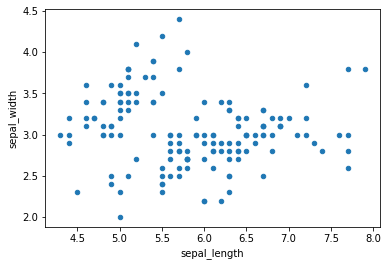

In [12]:
df.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.show()

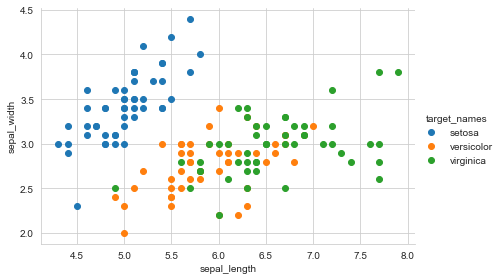

In [15]:
sns.set_style('whitegrid')
# plt.figure(figsize=(10, 8), dpi=200)
sns.FacetGrid(df, hue='target_names', height=4, aspect=1.5) \
   .map(plt.scatter, 'sepal_length', 'sepal_width') \
   .add_legend()
plt.show()

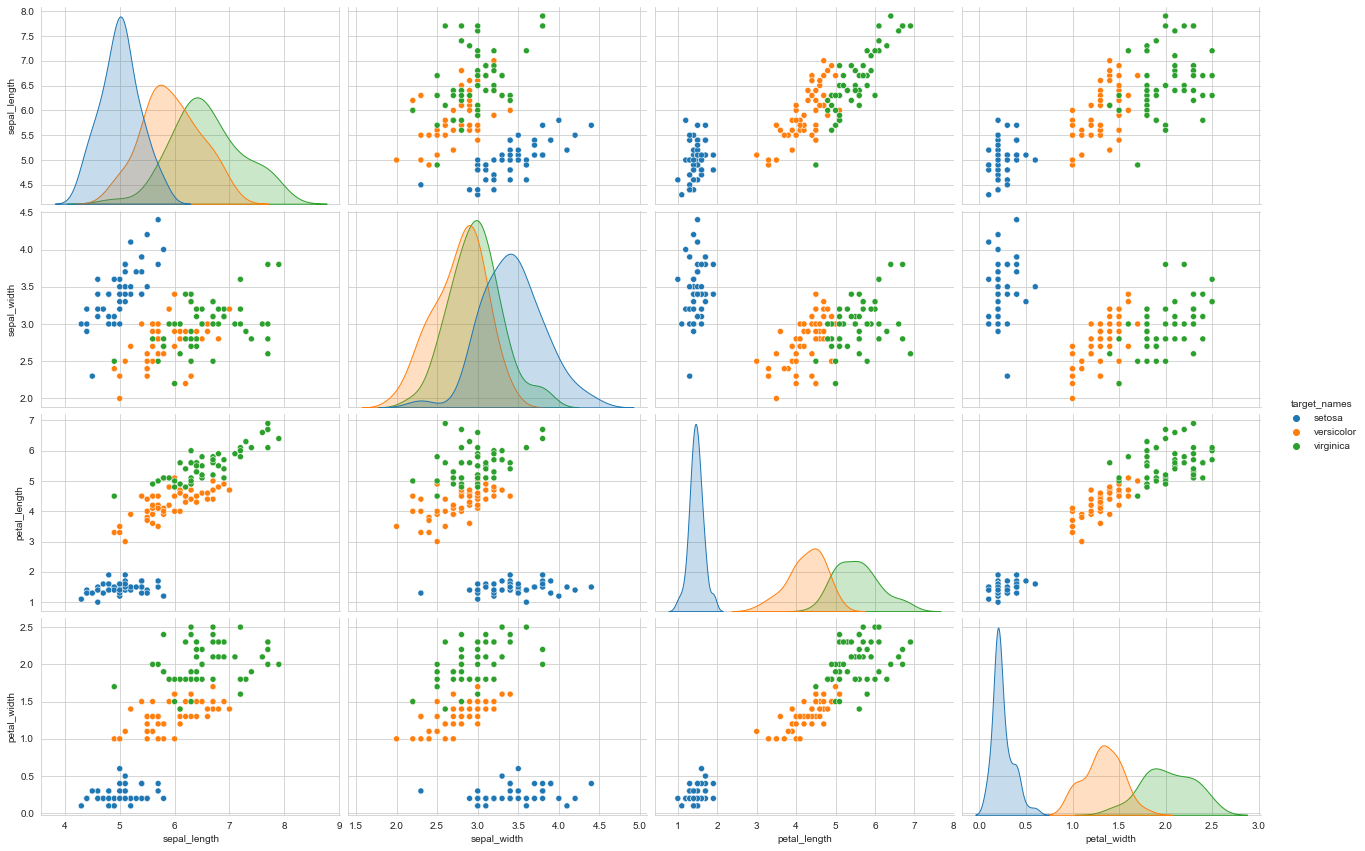

In [16]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df[['sepal_length', 'sepal_width', 'petal_length','petal_width', 'target_names']], hue='target_names', height = 3, aspect=1.5)
plt.show()

In [18]:
df_setosa = df.loc[df['target_names']=='setosa']
np.zeros_like(df_setosa['petal_length'])


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

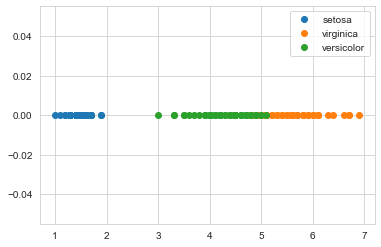

In [19]:
df_setosa = df.loc[df['target_names']=='setosa']
df_virginica = df.loc[df['target_names']=='virginica']
df_versicolor = df.loc[df['target_names']=='versicolor']

plt.plot(df_setosa['petal_length'], np.zeros_like(df_setosa['petal_length']), 'o', label='setosa')
plt.plot(df_virginica['petal_length'], np.zeros_like(df_virginica['petal_length']), 'o', label='virginica')
plt.plot(df_versicolor['petal_length'], np.zeros_like(df_versicolor['petal_length']), 'o', label='versicolor')

plt.legend()
plt.show()

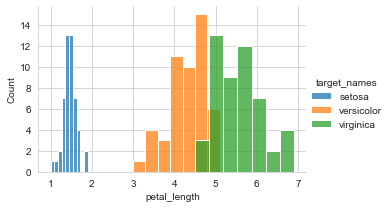

In [21]:
sns.FacetGrid(df, hue='target_names',height=3, aspect=1.5).map(sns.histplot,'petal_length').add_legend()
plt.show()

# Probability Distribution Function (PDF)

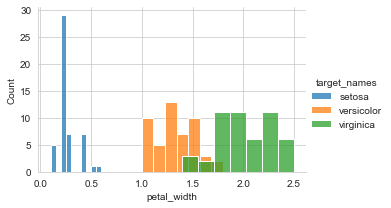

In [22]:
sns.FacetGrid(df, hue='target_names',height=3, aspect=1.5).map(sns.histplot,'petal_width').add_legend()
plt.show()

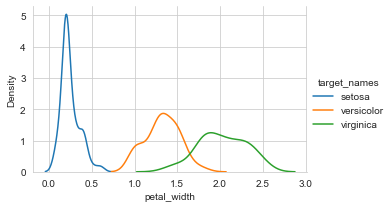

In [23]:
sns.FacetGrid(df, hue='target_names',height=3, aspect=1.5).map(sns.kdeplot,'petal_width').add_legend()
plt.show()

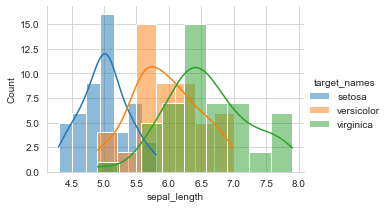

In [24]:
sns.FacetGrid(df, hue='target_names',height=3, aspect=1.5).map(sns.histplot,'sepal_length',kde=True).add_legend()
plt.show()

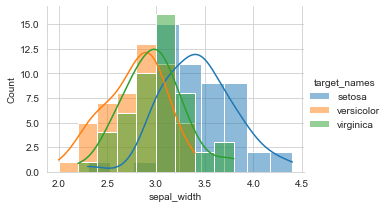

In [25]:
sns.FacetGrid(df, hue='target_names',height=3, aspect=1.5).map(sns.histplot,'sepal_width',kde=True).add_legend()
plt.show()

# Cumulative Distribution Function (CDF)

In [26]:
counts, bin_edges = np.histogram(df_setosa['petal_length'], bins=10,density=True)
print(counts)
print(bin_edges)

[0.22222222 0.22222222 0.44444444 1.55555556 2.88888889 2.88888889
 1.55555556 0.88888889 0.         0.44444444]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


In [27]:
pdf = counts/sum(counts)
pdf

array([0.02, 0.02, 0.04, 0.14, 0.26, 0.26, 0.14, 0.08, 0.  , 0.04])

In [28]:
cdf = np.cumsum(pdf)
cdf

array([0.02, 0.04, 0.08, 0.22, 0.48, 0.74, 0.88, 0.96, 0.96, 1.  ])

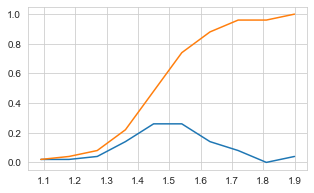

In [34]:
plt.figure(figsize=(5, 3))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

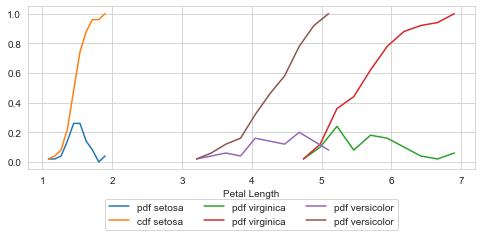

In [36]:
plt.figure(figsize=(8,3))
counts, bin_edges = np.histogram(df_setosa['petal_length'], bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf setosa') # applying the legend using lebel
plt.plot(bin_edges[1:],cdf,label='cdf setosa')


counts, bin_edges = np.histogram(df_virginica['petal_length'], bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf virginica')
plt.plot(bin_edges[1:],cdf,label='pdf virginica')


counts, bin_edges = np.histogram(df_versicolor['petal_length'], bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf versicolor')
plt.plot(bin_edges[1:],cdf,label='pdf versicolor')

plt.xlabel('Petal Length')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, ncol=3)
plt.show()

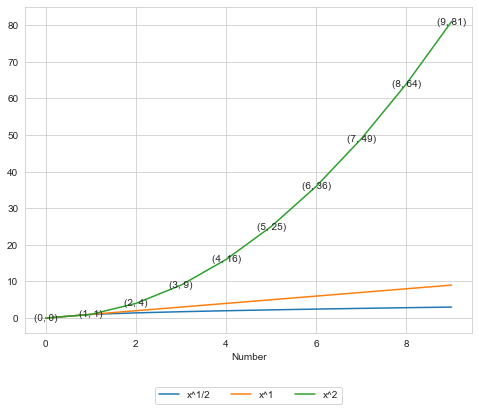

In [39]:
# Random Practice
plt.figure(figsize=(8,6))
plt.xlabel('Number')
plt.plot([i for i in range(10)],[i**(1/2) for i in range(10)],label='x^1/2')
plt.plot([i for i in range(10)],[i**1 for i in range(10)],label='x^1')
plt.plot([i for i in range(10)],[i**2 for i in range(10)],label='x^2')

for i in range(10):
    plt.text(i, i**2, f"({i}, {i**2})", horizontalalignment='center', verticalalignment='center')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, ncol=3)
plt.show()

# Mean, Variance & std-dev

In [40]:
print('Means:')
print(np.mean(df_setosa['petal_length']))
# Mean with an outlier
print(np.mean(np.append(df_setosa['petal_length'],50)))
print(np.mean(df_virginica['petal_length']))
print(np.mean(df_versicolor['petal_length']))

print('\nStd-dev:')
print(np.std(df_setosa['petal_length']))
print(np.std(df_virginica['petal_length']))
print(np.std(df_versicolor['petal_length']))

Means:
1.4620000000000002
2.4137254901960787
5.552
4.26

Std-dev:
0.17191858538273286
0.5463478745268441
0.4651881339845204


# Median, Percentile, Quantile, IQR, MAD

In [41]:
np.arange(0,100,25)

array([ 0, 25, 50, 75])

In [42]:
print('\nMedians:')
print(np.median(df_setosa['petal_length']))
# with outlier
print(np.median(np.append(df_setosa['petal_length'],50)))
print(np.median(df_virginica['petal_length']))
print(np.median(df_versicolor['petal_length']))

print('\nQuantiles:')
print(np.percentile(df_setosa['petal_length'],np.arange(0,100,25)))
print(np.percentile(df_virginica['petal_length'],np.arange(0,100,25)))
print(np.percentile(df_versicolor['petal_length'],np.arange(0,100,25)))

print('\n90th Percentile:')
print(np.percentile(df_setosa['petal_length'],90))
print(np.percentile(df_virginica['petal_length'],90))
print(np.percentile(df_versicolor['petal_length'],90))

from statsmodels import robust
print('\nMedian Absolute Deviation')
print(robust.mad(df_setosa['petal_length']))
print(robust.mad(df_virginica['petal_length']))
print(robust.mad(df_versicolor['petal_length']))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentile:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# Boxplots & Whiskers

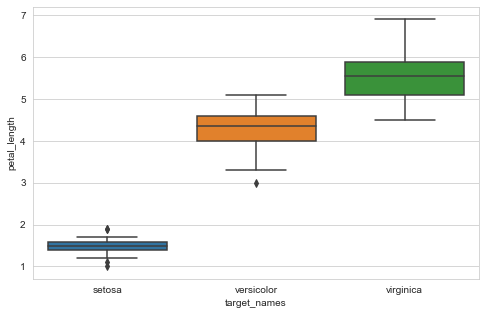

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target_names', y='petal_length',data=df)
plt.show()

# Violin Plots
- A combination of histogram, PDF & boxplots

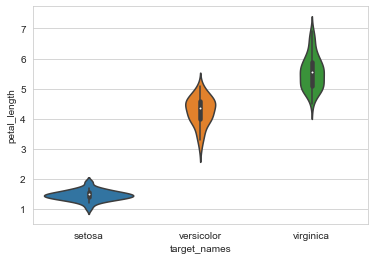

In [45]:
plt.figure(figsize=(6,4))
sns.violinplot(x='target_names', y='petal_length',data=df)
plt.show()

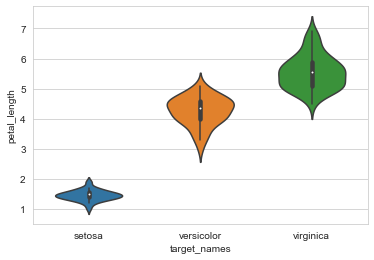

In [46]:
plt.figure(figsize=(6,4))
sns.violinplot(x='target_names', y='petal_length',data=df,inner='box', scale='width', width=0.6)
plt.show()

# Univariate, Bivariate & Multivariate Analysis

# Multivariate probability density, contour plot

<Figure size 432x288 with 0 Axes>

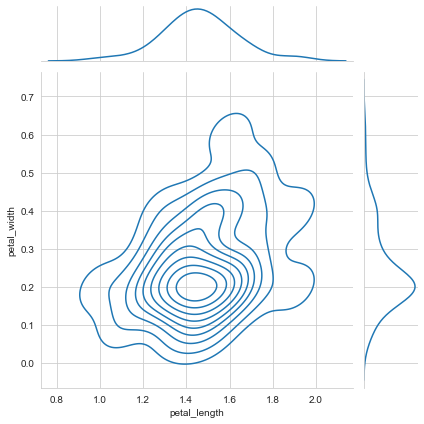

In [47]:
plt.close()
plt.figure(figsize=(6,4))
sns.jointplot(x='petal_length', y='petal_width',data=df_setosa,kind='kde')
plt.show()

In [48]:
# From chatgpt
import plotly.graph_objects as go

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_setosa['petal_length'],
    y=df_setosa['petal_width'],
    z=[0]*len(df_setosa),  # set z value to 0
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.5
    )
)])

# Create 3D density plot
fig.add_trace(go.Histogram2dContour(
    x=df_setosa['petal_length'],
    y=df_setosa['petal_width'],
    colorscale='blues',
    reversescale=True,
    xaxis='x',
    yaxis='y'
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Petal Length',
        yaxis_title='Petal Width',
        zaxis_title='Probability Density'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    width=700,
    height=700
)

fig.show()


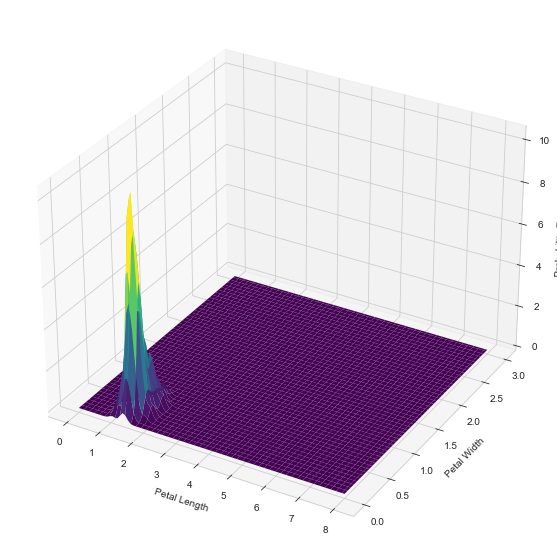

In [49]:
# from chatgpt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

# Create kernel density estimate
kde = gaussian_kde([df_setosa['petal_length'], df_setosa['petal_width']])
x, y = np.meshgrid(np.linspace(0, 8, 100), np.linspace(0, 3, 100))
z = kde(np.vstack([x.ravel(), y.ravel()])).reshape(x.shape)

# Plot 3D surface
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Probability Density')
plt.show()
